In [1]:
!git clone https://github.com/harrisonvanderbyl/rwkv-v5-state-tune.git
%cd rwkv-v5-state-tune

Cloning into 'rwkv-v5-state-tune'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 54 (delta 27), reused 41 (delta 14), pack-reused 0
Receiving objects: 100% (54/54), 387.79 KiB | 2.24 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/home/harrison/finetune-service/rwkv-v5-state-tune/rwkv-v5-state-tune


In [1]:
!pip install -r requirements.txt

In [1]:
from ipywidgets import interact, Textarea
import datasets


In [2]:

choices = {
    
}

models = {
    '0.4B': 'https://huggingface.co/BlinkDL/rwkv-5-world/resolve/main/RWKV-5-World-0.4B-v2-20231113-ctx4096.pth?download=true',
    '1.5B': 'https://huggingface.co/BlinkDL/rwkv-5-world/resolve/main/RWKV-5-World-1B5-v2-20231025-ctx4096.pth?download=true',
    '3.0B': 'https://huggingface.co/BlinkDL/rwkv-5-world/resolve/main/RWKV-5-World-3B-v2-20231113-ctx4096.pth?download=true',
    '7.0B': 'https://huggingface.co/BlinkDL/rwkv-5-world/resolve/main/RWKV-5-World-7B-v2-20240128-ctx4096.pth?download=true'
}

datasetOptions = {
    "ysharma/short_jokes": ["user: Tell me a joke\nassistant:", " {Joke}"],
    "Hazzzardous/synthetic-translations-6k-unvalidated": ["user: {Response_fr}\n\nuser: Translate the above to English\nassistant:", " {Input_ger}"],
    "PocketDoc/RUCAIBox-Story-Generation-Alpaca": ["system: {instruction}\n\nuser: {input}\nassistant:", " {output}"],
    "lonestar108/naughty-chat": ["user: {input}\nassistant:", " {output}"],
    "custom": ["user: {prompt}\nassistant:", " {response}"]
}
pp0 = Textarea(value=datasetOptions['custom'][0])
pp1 = Textarea(value=datasetOptions['custom'][1])
exampleout = Textarea(value="")
    
def chooseModel(Model, Dataset, prompt, response, **kwargs): 
    choices['model'] = Model,models[Model]
    
    choices['dataset'] = Dataset if Dataset != 'custom' else None
    # if Dataset == 'custom':
    #     choices['custom'] = input('Enter the URL to the dataset: ')
    
    # get first row of dataset
    # dataset = datasets.load_dataset(Dataset, split='train', streaming=True)
    # firstitem = next(iter(dataset))
    
    promptf, responsef = datasetOptions[Dataset]
    if pp0.value != promptf or pp1.value != responsef:
        pp0.value = promptf
        pp1.value = responsef
    
    choices['prompt'] = prompt
    choices['response'] = response
    

interact(chooseModel, **{"Model":models.keys(), "Dataset":datasetOptions.keys()},  prompt=pp0, response=pp1)





interactive(children=(Dropdown(description='Model', options=('0.4B', '1.5B', '3.0B', '7.0B'), value='0.4B'), D…

<function __main__.chooseModel(Model, Dataset, prompt, response, **kwargs)>

No ROCm runtime is found, using ROCM_HOME='/opt/rocm'
Using /home/harrison/.cache/torch_extensions/py310_cu121 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/harrison/.cache/torch_extensions/py310_cu121/wkv5/build.ninja...
/home/harrison/.conda/envs/cuda/lib/python3.10/site-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module wkv5...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module wkv5...


ninja: no work to do.
{'': '', 'f=/home/harrison/.local/share/jupyter/runtime/kernel-v2-4317F9KgETpr7xka.json': ''}
Masked input:
 user: I sent you a $25.00 tip
assistant:
Completion:
  oh that great thank you


/home/harrison/finetune-service/rwkv-v5-state-tune/train.py:333: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(tensor, device=self.emb.weight.device)


3.96484
3.94473
3.88343
3.87832
3.86253
3.90221
3.88054
3.81855
3.79871
3.76971
3.74763
3.75635
3.75212
3.69967
3.68266
3.68446
3.70336
3.64866
3.61389
3.56679
3.53532
3.52731
3.52360
3.46539
3.43274
3.46111
3.43024
3.41029
3.37337
3.42189
3.41798
3.36583
3.37020
3.34700
3.36090
3.35379
3.30563
3.31301
3.25673
3.25483
3.23818
3.24346
3.26020
3.21125
3.19834
3.20952
3.18029
3.16425
3.13338
3.13530
3.14573
3.11500
3.08972
3.04305
3.02058
3.01955
2.95920
2.99015
2.99455
3.03622
3.02035
3.05293
3.01591
2.99089
2.95853
2.95045
2.90918
2.90981
2.89167
2.85099
2.89985
2.91345
2.89199
2.85443
2.85155
2.80350
2.79770
2.76485
2.76020
2.80891
2.79737
2.81922
2.86341
2.81790
2.79419
2.80917
2.79293
2.82985
2.83132
2.83194
2.81769
2.75610
2.74955
2.72223
2.81893
2.81783
2.79100
2.77957
2.77653
2.75802
2.75137
2.75989
2.73362
2.71022
2.72080
2.71367
2.71001
2.67920
2.66165
2.63716
2.62639
2.58882
2.59766
2.59669
2.59732
2.55964
2.53166
2.52461
2.56713
2.55830
2.52765
2.51924
2.54797
2.57057
2.55063


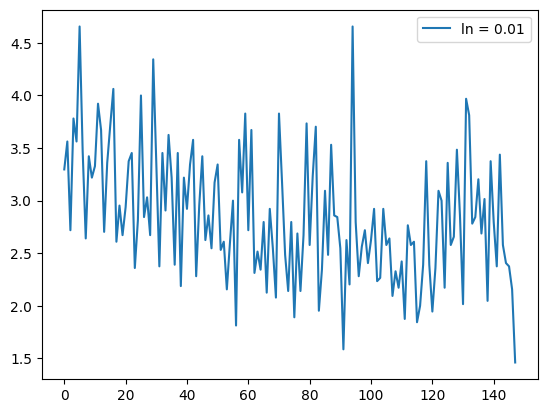

In [3]:
from train import train_model

model = train_model(
    model_location=choices['model'][0]+".pth",
    huggingface_dataset=choices['dataset'],
    data_path=choices['dataset'].replace("/","_")+".jsonl",
    model_url=choices['model'][1],
    prompt_formatter=pp0.value,
    response_formatter=pp1.value,
    save_filename="state_"+choices['model'][0]+".pth",
)

In [52]:
conversation = []
import torch
from math import e
def dart_sample(out, temperature=1.0, top_p=0.8):
    out = torch.softmax(out, dim=-1)    
    min = torch.min(out)
    max = torch.max(out)
    topp = pow(e,-pow(e,e-(top_p*e*e)))
    dart = torch.rand(1, device=out.device).pow(temperature)
    dart = dart
    min = max * (1 - topp) + min * topp
    dart = min * (1 - dart) + max * dart
    
    out = torch.argmin(torch.abs(out - dart)).item()
    
    return out

from ipywidgets import interact, Textarea, FloatSlider
model = model.eval()
from tokenizer import world
state = torch.load("state_"+choices['model'][0]+".pth")
model.load_state(state)
messagebox = Textarea(value="")

howMuchSlider = FloatSlider(value=1,min=0,max=1,step=0.1)
temp = FloatSlider(value=0.0,min=0,max=1,step=0.1)
top_p = FloatSlider(value=0.5,min=0,max=1,step=0.1)
lasttop_p = 0.5
last_temp = 0.0
currentstatemix = 1.0
def newMessage(message, statemix, temp, top_p):
    global conversation, currentstatemix, lasttop_p, last_temp
    if "\n" not in message:
        currentstatemix = statemix
        
        state = torch.load("state_"+choices['model'][0]+".pth")

        mixstate = model.new_state(1)
        newstate = {
            key: torch.lerp(mixstate[key], state[key],statemix) for key in mixstate.keys()
        }
        model.load_state(newstate)
        convo = "\n\n".join(conversation)
        context = world.encode(convo)
        model([context]) if convo else ""
        
    saveit = False
    
    if "\n" in message:
        
        conversation += ["user: "+ message[:-1]]
        
        messagebox.value = ""
        nextinps = world.encode("user: "+message[:-1]+"\n\nassistant:")
        logits = model([nextinps])[0,-1]
        print("\n")
        print("\n".join(conversation)+"\n\nassistant:", end="", flush=True)
        saveit = True
    else:
        
        nextinps = world.encode("user: "+message+"\n\nassistant:")
        logits = model([nextinps])[0,-1]
        
        print("\n".join(conversation)+"\n\nuser: "+message + "\n\nassistant:", end="", flush=True)
    
    
    outputs = ""
    buffer = []
    
    
    for i in range(50):
        nextobj = dart_sample(logits,temp,top_p)#logits.argmax(-1).cpu().item()
        
        buffer += [nextobj]
        try:
            nextmessage = world.decode(buffer)
            buffer = []
            if "\n" in nextmessage:
                break
            outputs += nextmessage
            
            print(nextmessage, end="", flush=True)
            
            logits = model([[nextobj]])
        except:
            pass
    if saveit:
        conversation += ["assistant: " + outputs]
        model([[261]])


interact(newMessage, message=messagebox, statemix=howMuchSlider, temp=temp, top_p=top_p)

# newMessage("\n")

interactive(children=(Textarea(value='', description='message'), FloatSlider(value=1.0, description='statemix'…

<function __main__.newMessage(message, statemix, temp, top_p)>